In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor

In [2]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_ID =  pd.read_csv("Customer_ID.csv")
Transaction_ID = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [7]:
City.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [8]:
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [9]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [10]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [11]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [12]:
#Modify the datetime format
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [13]:
Cab_Data['Date_of_Travel']=Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [14]:
Cab_Data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
#split Date_of_Travel into month, year seperatly
months=[]
years=[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month']=months
Cab_Data['Year']=years
#Drop colum'Data_of_Travel'
Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

In [16]:
#before doing EDA, split the dataset into Pink Cab and Yellow Cab
PinkCab=Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab=Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [17]:
Cab_Data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [18]:
#Creating Master Data
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [19]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966


In [20]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001"


In [21]:
YellowCab = data[data['Company']=='Yellow Cab']
PinkCab = data[data['Company']=='Pink Cab']

In [22]:
YellowCab.drop(['Company', 'Payment_Mode', 'Gender','Population','Users'], axis=1, inplace=True)

C:\Users\ohkyu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
PinkCab.drop(['Company', 'Payment_Mode', 'Gender','Population','Users'], axis=1, inplace=True)

In [24]:
YellowCab_X = YellowCab.drop(['Price_Charged'], axis=1)
YellowCab_y = YellowCab['Price_Charged'].copy()

In [25]:
PinkCab_X = PinkCab.drop(['Price_Charged'], axis=1)
PinkCab_y = PinkCab['Price_Charged'].copy()

In [26]:
#Yellow Cab base model
import statsmodels.api as sm

In [27]:
x_constant=sm.add_constant(YellowCab_X)
YellowCab_model =sm.OLS(YellowCab_y, x_constant).fit()
YellowCab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 1.336e+05
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:38:59   Log-Likelihood:            -1.7581e+06
No. Observations:              274681   AIC:                         3.516e+06
Df Residuals:                  274674   BIC:                         3.516e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.808e+04    699.967     40.114      0.000    2.67e+04    2.95e+04
KM_Travelled          20.3318      0.198    102.702      0.000      19.944      20.720
Cost_of_Trip          -0.0054      0.015     -0.363      0.716      -0.035       0.024
Month                 -5.4445      0.081    -67.624      0.000      -5.602      -5.287
Year                 -13.8998      0.347    -40.055      0.000     -14.580     -13.220
Age                   -0.0835      0.022     -3.778      0.000      -0.127      -0.040
Income_(USD/Month)     0.0002   3.49e-05      4.774      0.000    9.83e-05       0.000
==============================================================================
Omnibus:                    51953.813   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122979.286
Skew:                           1.070   Prob(JB):                         0.00
Kurtosis:                       5.482   Cond. No.                     4.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x_constant=sm.add_constant(PinkCab_X)
PinkCab_model =sm.OLS(PinkCab_y, x_constant).fit()
PinkCab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 8.892e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:38:59   Log-Likelihood:            -4.7684e+05
No. Observations:               84711   AIC:                         9.537e+05
Df Residuals:                   84704   BIC:                         9.538e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.557e+04    583.563     26.689      0.000    1.44e+04    1.67e+04
KM_Travelled          13.4783      0.165     81.893      0.000      13.156      13.801
Cost_of_Trip           0.0299      0.015      2.012      0.044       0.001       0.059
Month                  1.7163      0.070     24.634      0.000       1.580       1.853
Year                  -7.7282      0.289    -26.713      0.000      -8.295      -7.161
Age                   -0.0399      0.018     -2.178      0.029      -0.076      -0.004
Income_(USD/Month)  3.486e-05    2.9e-05      1.203      0.229   -2.19e-05    9.16e-05
==============================================================================
Omnibus:                    28875.490   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272988.442
Skew:                           1.369   Prob(JB):                         0.00
Kurtosis:                      11.357   Cond. No.                     4.32e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [105]:
X_train, X_test, y_train, y_test = train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [106]:
train_pred = lin_reg.predict(X_train)
print(f'Train score {np.sqrt(mean_squared_error(y_train, train_pred))}')

predicted = lin_reg.predict(X_test)
print(f'Test score {np.sqrt(mean_squared_error(y_test, predicted))}')

Train score 145.4872641367467
Test score 146.2237132304342


In [107]:
X_train, X_test, y_train, y_test = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [108]:
train_pred = lin_reg.predict(X_train)
print(f'Train score {np.sqrt(mean_squared_error(y_train, train_pred))}')

predicted = lin_reg.predict(X_test)
print(f'Test score {np.sqrt(mean_squared_error(y_test, predicted))}')

Train score 67.16444485498958
Test score 67.83669219329067


In [109]:
#Correlation
PinkCab.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84711 entries, (10000011, 29290, 'ATLANTA GA') to (10437615, 51996, 'WASHINGTON DC')
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KM_Travelled        84711 non-null  float64
 1   Price_Charged       84711 non-null  float64
 2   Cost_of_Trip        84711 non-null  float64
 3   Month               84711 non-null  int64  
 4   Year                84711 non-null  int64  
 5   Age                 84711 non-null  int64  
 6   Income_(USD/Month)  84711 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 17.4+ MB


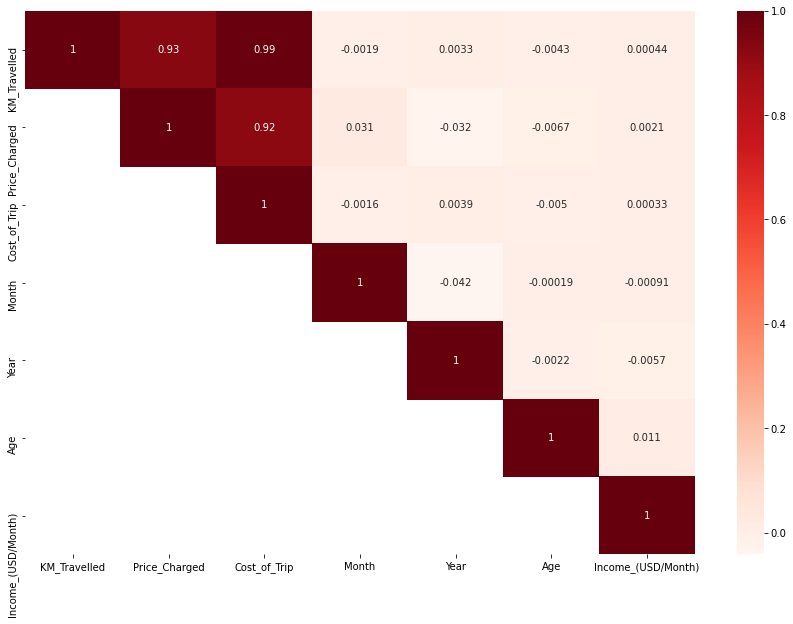

In [35]:
plt.figure(figsize=(15,10))
corr_m=PinkCab.corr()
x=np.tri(corr_m.shape[0], k=-1)
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds, mask=x)
plt.show()

In [110]:
corr_m['Price_Charged'].abs().sort_values(ascending=False)[1:]

KM_Travelled          0.859709
Cost_of_Trip          0.853996
Month                 0.065493
Year                  0.038717
Income_(USD/Month)    0.003818
Age                   0.002721
Name: Price_Charged, dtype: float64

In [111]:
#Correlation
YellowCab.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 274681 entries, (10000384, 27602, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   KM_Travelled        274681 non-null  float64
 1   Price_Charged       274681 non-null  float64
 2   Cost_of_Trip        274681 non-null  float64
 3   Month               274681 non-null  int64  
 4   Year                274681 non-null  int64  
 5   Age                 274681 non-null  int64  
 6   Income_(USD/Month)  274681 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 29.2+ MB


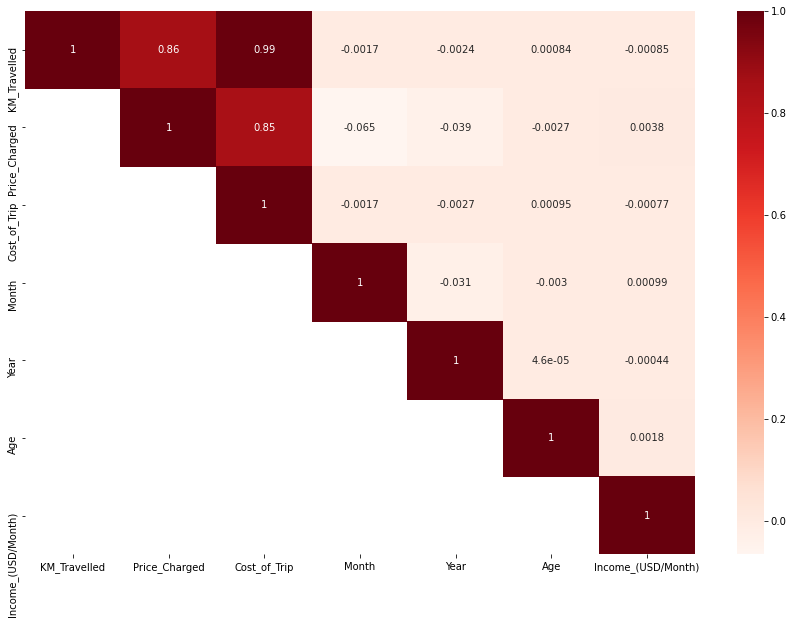

In [112]:
plt.figure(figsize=(15,10))
corr_m=YellowCab.corr()
x=np.tri(corr_m.shape[0], k=-1)
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds, mask=x)
plt.show()

In [113]:
corr_m['Price_Charged'].abs().sort_values(ascending=False)[1:]

KM_Travelled          0.859709
Cost_of_Trip          0.853996
Month                 0.065493
Year                  0.038717
Income_(USD/Month)    0.003818
Age                   0.002721
Name: Price_Charged, dtype: float64

Model Building
Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [116]:
#YellowCab
X_trainu, X_testu, y_trainu, y_testu=train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)


In [117]:
lin_reg_YellowCab = LinearRegression()
lin_reg_YellowCab.fit(X_trainu, y_trainu)

LinearRegression()

In [118]:
# print(f'Train score : {lin_reg_YellowCab.score(X_trainu, y_trainu)}')
print(f'Train RMSE score : {np.sqrt(mean_squared_error(y_trainu, lin_reg_YellowCab.predict(X_trainu)))}')
predicted = lin_reg_YellowCab.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train RMSE score : 145.4872641367467
Test score : 146.2237132304342


In [119]:
train_cv = cross_val_score(LinearRegression(), X_trainu, y_trainu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(LinearRegression(), X_testu, y_testu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

l_reg_YellowCab = {}
l_reg_YellowCab['Train'] = round(train_rmse, 4)
l_reg_YellowCab['Test'] = round(test_rmse, 4)
l_reg_YellowCab

{'Train': 145.4939, 'Test': 146.2176}

In [120]:
model = LinearRegression()
model.fit(X_trainu, y_trainu)

LinearRegression()

In [122]:
accuracyl_YellowCab = model.score(X_testu,y_testu)
print('The accuracy is: ' + str(accuracyl_YellowCab *100) + '%')

The accuracy is: 74.43268021230067%


In [123]:
#Pink Cab
X_trainl, X_testl, y_trainl, y_testl = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

In [124]:
lin_reg_PinkCab = LinearRegression()
lin_reg_PinkCab.fit(X_trainl, y_trainl)

LinearRegression()

In [125]:
print(f'Train RMSE score : {np.sqrt(mean_squared_error(y_trainl, lin_reg_PinkCab.predict(X_trainl)))}')
predicted = lin_reg_PinkCab.predict(X_testl)
rmse=np.sqrt(mean_squared_error(y_testl, predicted))
print(f'Test score:{rmse}')

Train RMSE score : 67.16444485498958
Test score:67.83669219329067


In [126]:
train_cv = cross_val_score(LinearRegression(), X_trainl, y_trainl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(LinearRegression(), X_testl, y_testl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

l_reg_PinkCab = {}
l_reg_PinkCab['Train'] = round(train_rmse, 4)
l_reg_PinkCab['Test'] = round(test_rmse, 4)
l_reg_PinkCab

{'Train': 67.1721, 'Test': 67.8282}

In [127]:
model=LinearRegression()
model.fit(X_trainl, y_trainl)

LinearRegression()

In [128]:
accuracyl_PinkCab = model.score(X_testl,y_testl)
print('The accuracy is: ' + str(accuracyl_PinkCab *100) + '%')

The accuracy is: 86.09711090631818%


In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve

In [133]:
#YellowCab
X_trainu, X_testu, y_trainu, y_testu = train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

In [134]:
dtree = DecisionTreeRegressor()

dtree.fit(X_trainu, y_trainu)

train_pred = dtree.predict(X_trainu)

tr_rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
print(f'Train score : {tr_rmse}')
predicted = dtree.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train score : 0.18173263352632787
Test score : 207.1109082831866


In [135]:
max_depth = range(1,20)
train_results = []
test_results = []
for n in max_depth:
    dt = DecisionTreeRegressor(max_depth=n)
    dt.fit(X_trainu, y_trainu)
    train_pred = dt.predict(X_trainu)
    rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
    train_results.append(rmse)
    y_pred = dt.predict(X_testu)
    ts_rmse = np.sqrt(mean_squared_error(y_testu, y_pred))
    test_results.append(ts_rmse)

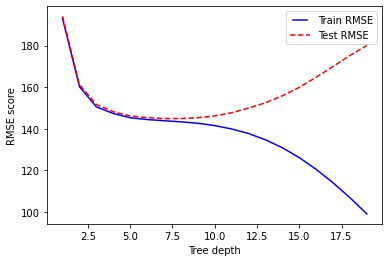

In [136]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depth, test_results, 'r--', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Tree depth')
plt.show()

In [145]:
dtree = DecisionTreeRegressor(max_depth=5)

dtree.fit(X_trainu, y_trainu)

train_pred = dtree.predict(X_trainu)

tr_rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
print(f'Train score : {tr_rmse}')
predicted = dtree.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train score : 145.28305626989584
Test score : 146.14129406367076


In [146]:
train_cv = cross_val_score(DecisionTreeRegressor(), X_trainu, y_trainu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(DecisionTreeRegressor(), X_testu, y_testu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

dt_reg_YellowCab = {}
dt_reg_YellowCab['Train'] = round(train_rmse, 4)
dt_reg_YellowCab['Test'] = round(test_rmse, 4)
dt_reg_YellowCab

{'Train': 206.9774, 'Test': 207.6041}

In [143]:
model = DecisionTreeRegressor()
model.fit(X_trainu, y_trainu)

DecisionTreeRegressor()

In [140]:
accuracyd_YellowCab  = model.score(X_trainu, y_trainu)
print('The accuracy is: ' + str(accuracyd_YellowCab *100) + '%')

The accuracy is: 99.99996019332049%


In [141]:
#Pink Cab
X_trainl, X_testl, y_trainl, y_testl=train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

In [142]:
dtree = DecisionTreeRegressor(max_depth=5)

dtree.fit(X_trainl, y_trainl)

train_pred = dtree.predict(X_trainl)

tr_rmse = np.sqrt(mean_squared_error(y_trainl, train_pred))
print(f'Train score : {tr_rmse}')
predicted = dtree.predict(X_testl)
rmse = np.sqrt(mean_squared_error(y_testl, predicted))
print(f'Test score : {rmse}')

Train score : 66.92077775997672
Test score : 67.85002656863335


In [62]:
train_cv = cross_val_score(DecisionTreeRegressor(), X_trainl, y_trainl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(DecisionTreeRegressor(), X_testl, y_testl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

dt_reg_PinkCab = {}
dt_reg_PinkCab['Train'] = round(train_rmse, 4)
dt_reg_PinkCab['Test'] = round(test_rmse, 4)
dt_reg_PinkCab

{'Train': 95.1079, 'Test': 95.5189}

In [63]:
model=DecisionTreeRegressor()
model.fit(X_trainl, y_trainl)

DecisionTreeRegressor()

In [64]:
accuracyd_PinkCab  = model.score(X_trainu, y_trainu)
print('The accuracy is: ' + str(accuracyd_PinkCab *100) + '%')

The accuracy is: 37.38390104036119%


In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
#YellowCab

In [67]:
X_trainu, X_testu, y_trainu, y_testu=train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

In [68]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

rf.fit(X_trainu, y_trainu)

train_pred = rf.predict(X_trainu)

tr_rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
print(f'Train score : {tr_rmse}')
predicted = rf.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train score : 55.50788754169844
Test score : 148.84815085629765


In [69]:
train_cv = cross_val_score(RandomForestRegressor(), X_trainu, y_trainu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(RandomForestRegressor(), X_testu, y_testu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

rf_reg_YellowCab = {}
rf_reg_YellowCab['Train'] = round(train_rmse, 4)
rf_reg_YellowCab['Test'] = round(test_rmse, 4)
rf_reg_YellowCab

{'Train': 148.1592, 'Test': 148.6864}

In [70]:
model = RandomForestRegressor()
model.fit(X_trainu, y_trainu)

RandomForestRegressor()

In [92]:
accuracyr_YellowCab= model.score(X_testl,y_testl)
print('The accuracy is: ' + str(accuracyr_YellowCab *100) + '%')

The accuracy is: 86.0883875041365%


In [72]:
#PinkCab

In [83]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

In [84]:
rf = RandomForestRegressor()
rf.fit(X_trainl, y_trainl)

train_pred = rf.predict(X_trainl)

tr_rmse = np.sqrt(mean_squared_error(y_trainl, train_pred))
print(f'Train score : {tr_rmse}')
predicted = rf.predict(X_testl)
rmse = np.sqrt(mean_squared_error(y_testl, predicted))
print(f'Test score : {rmse}')

Train score : 25.205281468824566
Test score : 67.74716565791756


In [75]:
train_cv = cross_val_score(RandomForestRegressor(), X_trainl, y_trainl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(RandomForestRegressor(), X_testl, y_testl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

rf_reg_PinkCab = {}
rf_reg_PinkCab['Train'] = round(train_rmse, 4)
rf_reg_PinkCab['Test'] = round(test_rmse, 4)
rf_reg_PinkCab

{'Train': 67.4797, 'Test': 68.3633}

In [85]:
model = RandomForestRegressor()
model.fit(X_trainl, y_trainl)

RandomForestRegressor()

In [93]:
accuracyr_PinkCab  = model.score(X_trainu, y_trainu)
print('The accuracy is: ' + str(accuracyr_PinkCab *100) + '%')

The accuracy is: 43.43794492338886%


In [94]:
final_results = pd.DataFrame([l_reg_YellowCab,dt_reg_YellowCab,
                              rf_reg_YellowCab],
                            index=['Linear Regression','Decision Tree','Random Forest'])
final_results

,Train,Test
Linear Regression,145.4939,146.2176
Decision Tree,207.0249,207.2360
Random Forest,148.1592,148.6864


In [95]:
final_results = pd.DataFrame([l_reg_PinkCab,dt_reg_PinkCab,
                              rf_reg_PinkCab],
                            index=['Linear Regression',
                                  'Decision Tree', 'Random Forest'])
final_results

,Train,Test
Linear Regression,67.1721,67.8282
Decision Tree,95.1079,95.5189
Random Forest,67.4797,68.3633


In [96]:
final_results = pd.DataFrame([str(accuracyl_YellowCab *100) + '%', str(accuracyd_YellowCab *100) + '%',str(accuracyr_YellowCab *100) + '%'],
                            index=['Linear Regression',
                                  'Decision Tree', 'Random Forest'],columns=['Accuracy'])
final_results

,Accuracy
Linear Regression,74.43268021230067%
Decision Tree,96.28639548578654%
Random Forest,86.0883875041365%


In [97]:
final_results = pd.DataFrame([str(accuracyl_PinkCab *100) + '%', str(accuracyd_PinkCab *100) + '%',str(accuracyr_PinkCab *100) + '%'],
             
                             index=['Linear Regression',
                                  'Decision Tree', 'Random Forest'],columns=['Accuracy'])
final_results

,Accuracy
Linear Regression,86.09711090631818%
Decision Tree,43.43794492338886%
Random Forest,43.43794492338886%
